# Google Data Analytics Capstone Project 
## Case Study : How Does a Bike-Share Navigate Speedy Success?

### Business task

The analysts of the **Cyclistic** comapany have calculated that the annual members are much more profitable than casual riders. So, maximizing the number of annual membership will be the key to success for the business. It will be good to convert casual riders into members rather than targeting all new customers. So, the goal is to understand how casual riders and annual members use cyclistic bikes differently so that a strategy can be developed to convert casual riders into annual members.  

### Importing data

 **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

**Importing the files**

In [2]:
M1=pd.read_csv('202101-divvy-tripdata.csv')
M2=pd.read_csv('202102-divvy-tripdata.csv')
M3=pd.read_csv('202103-divvy-tripdata.csv')
M4=pd.read_csv('202104-divvy-tripdata.csv')
M5=pd.read_csv('202105-divvy-tripdata.csv')
M6=pd.read_csv('202106-divvy-tripdata.csv')
M7=pd.read_csv('202107-divvy-tripdata.csv')
M8=pd.read_csv('202108-divvy-tripdata.csv')
M9=pd.read_csv('202109-divvy-tripdata.csv')
M10=pd.read_csv('202110-divvy-tripdata.csv')
M11=pd.read_csv('202111-divvy-tripdata.csv')
M12=pd.read_csv('202112-divvy-tripdata.csv')


**Merging all the data for 12 months in a single dataframe**

In [3]:
bike_data=pd.concat([M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12])

In [6]:
# Reading the merged data
bike_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


In [7]:
# Shape of the data
bike_data.shape

(5595063, 13)

## Data Cleaning and Manipulation

In [8]:
# Info of the data
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


**Here we can see that the started at and ended at are having object data type, so let's convert these into datetime data type**

In [4]:
# Converting Object data type of start_time and end_time into datetime data type
bike_data['start_time']=pd.to_datetime(bike_data['started_at'])
bike_data['end_time']=pd.to_datetime(bike_data['ended_at'])

In [5]:
# Adding new column for ride length to calculate the total time travelled by the rider
bike_data['ride_length']=bike_data['end_time']-bike_data['start_time']
bike_data['ride_length']

0        0 days 00:10:25
1        0 days 00:04:04
2        0 days 00:01:20
3        0 days 00:11:42
4        0 days 00:00:43
               ...      
247535   0 days 00:19:13
247536   0 days 00:07:01
247537   0 days 00:08:17
247538   0 days 00:14:13
247539   0 days 00:03:37
Name: ride_length, Length: 5595063, dtype: timedelta64[ns]

In [6]:
# Updated Info
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 16 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          object         
 3   ended_at            object         
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  start_time          datetime64[ns] 
 14  end_time            datetime64[ns] 
 15  ride_length         timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(9), timedelta64[ns](1)
memory usage: 725.7+ MB


In [7]:
#Extracting date from started_at column and converting the datatype into datetime datatype
bike_data['start_date']=[i.split(" ")[0] for i in bike_data['started_at']]
bike_data['start_date']=pd.to_datetime(bike_data['start_date'])
bike_data['start_date']

0        2021-01-23
1        2021-01-27
2        2021-01-21
3        2021-01-07
4        2021-01-23
            ...    
247535   2021-12-12
247536   2021-12-06
247537   2021-12-02
247538   2021-12-13
247539   2021-12-13
Name: start_date, Length: 5595063, dtype: datetime64[ns]

In [8]:
# Finding weekday from the start_date
bike_data['week_day']=bike_data['start_date'].apply(lambda x: x.weekday())
bike_data['week_day'].unique()


array([5, 2, 3, 0, 6, 4, 1], dtype=int64)

In [9]:
# Converting week_day values into weekday
dict={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
bike_data['week_day']=bike_data['week_day'].apply(lambda y: dict[y])
bike_data['week_day']

0            Friday
1           Tuesday
2         Wednesday
3         Wednesday
4            Friday
            ...    
247535     Saturday
247536       Sunday
247537    Wednesday
247538       Sunday
247539       Sunday
Name: week_day, Length: 5595063, dtype: object

In [10]:
# Sorting data in ascending order of start time
bike_data.sort_values(by=['started_at'],inplace=True,ascending=True)

In [11]:
# Dropping rows with null values
bike_data1=bike_data.dropna()

In [18]:
# Saving cleaned file for further transformation
bike_data1.to_csv('Cleaned_bike_data.csv')

In [12]:
C_bike_data=pd.read_csv('Cleaned_bike_data.csv')
C_bike_data.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,ride_length,start_date,week_day
0,17801,FAC81448E15B3C05,classic_bike,2/1/2021 10:01,2/1/2021 10:05,Wells St & Polk St,SL-011,State St & Harrison St,SL-007,41.872596,-87.633502,41.874053,-87.627716,member,2021-02-01 10:01:00,2021-02-01 10:05:00,0 days 00:04:00,2021-02-01 00:00:00,Sunday
1,26708,D4795A47726841B2,classic_bike,2/1/2021 10:02,2/1/2021 10:08,Dearborn St & Erie St,13045,Franklin St & Chicago Ave,13017,41.893992,-87.629318,41.896747,-87.635668,member,2021-02-01 10:02:00,2021-02-01 10:08:00,0 days 00:06:00,2021-02-01 00:00:00,Sunday
2,11071,85A06CF61EE5B1CE,classic_bike,2/1/2021 10:03,2/1/2021 10:14,Benson Ave & Church St,596,Chicago Ave & Washington St,E002,42.048214,-87.683485,42.032562,-87.679101,member,2021-02-01 10:03:00,2021-02-01 10:14:00,0 days 00:11:00,2021-02-01 00:00:00,Sunday
3,8671,61BBED9F6F7E0D9B,classic_bike,2/1/2021 10:04,2/1/2021 10:15,Wabash Ave & 9th St,TA1309000010,Dearborn St & Monroe St,TA1305000006,41.870769,-87.625734,41.881320,-87.629521,member,2021-02-01 10:04:00,2021-02-01 10:15:00,0 days 00:11:00,2021-02-01 00:00:00,Sunday
4,42741,8237FF0F89A56016,electric_bike,2/1/2021 10:04,2/1/2021 11:39,Orleans St & Merchandise Mart Plaza,TA1305000022,Wells St & Hubbard St,TA1307000151,41.887968,-87.636742,41.889646,-87.634283,member,2021-02-01 10:04:00,2021-02-01 11:39:00,0 days 01:35:00,2021-02-01 00:00:00,Sunday


In [13]:
# To calculate euclidean distance between start and end point
C_bike_data["x"]=(C_bike_data["end_lat"]-C_bike_data["start_lat"])**2
C_bike_data["y"]=(C_bike_data["end_lng"]-C_bike_data["start_lng"])**2
C_bike_data["distance"]=(C_bike_data["x"]+C_bike_data["y"])**(1/2)
C_bike_data["distance"]

0          0.005967
1          0.006922
2          0.016254
3          0.011210
4          0.002977
             ...   
4588297    0.019518
4588298    0.018936
4588299    0.000770
4588300    0.017074
4588301    0.005254
Name: distance, Length: 4588302, dtype: float64

In [14]:
# To extract year and month from start date column
C_bike_data['year']=pd.DatetimeIndex(C_bike_data['start_date']).year
C_bike_data['month']=pd.DatetimeIndex(C_bike_data['start_date']).month

In [15]:
# Convert object datatype to timedelta
C_bike_data['ride_len']=pd.to_timedelta(C_bike_data['ride_length'])
C_bike_data

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,end_time,ride_length,start_date,week_day,x,y,distance,year,month,ride_len
0,17801,FAC81448E15B3C05,classic_bike,2/1/2021 10:01,2/1/2021 10:05,Wells St & Polk St,SL-011,State St & Harrison St,SL-007,41.872596,...,2021-02-01 10:05:00,0 days 00:04:00,2021-02-01 00:00:00,Sunday,2.122849e-06,3.347780e-05,0.005967,2021,2,0 days 00:04:00
1,26708,D4795A47726841B2,classic_bike,2/1/2021 10:02,2/1/2021 10:08,Dearborn St & Erie St,13045,Franklin St & Chicago Ave,13017,41.893992,...,2021-02-01 10:08:00,0 days 00:06:00,2021-02-01 00:00:00,Sunday,7.589860e-06,4.031767e-05,0.006922,2021,2,0 days 00:06:00
2,11071,85A06CF61EE5B1CE,classic_bike,2/1/2021 10:03,2/1/2021 10:14,Benson Ave & Church St,596,Chicago Ave & Washington St,E002,42.048214,...,2021-02-01 10:14:00,0 days 00:11:00,2021-02-01 00:00:00,Sunday,2.449851e-04,1.921946e-05,0.016254,2021,2,0 days 00:11:00
3,8671,61BBED9F6F7E0D9B,classic_bike,2/1/2021 10:04,2/1/2021 10:15,Wabash Ave & 9th St,TA1309000010,Dearborn St & Monroe St,TA1305000006,41.870769,...,2021-02-01 10:15:00,0 days 00:11:00,2021-02-01 00:00:00,Sunday,1.113198e-04,1.434076e-05,0.011210,2021,2,0 days 00:11:00
4,42741,8237FF0F89A56016,electric_bike,2/1/2021 10:04,2/1/2021 11:39,Orleans St & Merchandise Mart Plaza,TA1305000022,Wells St & Hubbard St,TA1307000151,41.887968,...,2021-02-01 11:39:00,0 days 01:35:00,2021-02-01 00:00:00,Sunday,2.815114e-06,6.047517e-06,0.002977,2021,2,0 days 01:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588297,131716,7B3D0E8AB0842D5E,classic_bike,2021-12-31 23:58:21,2022-01-01 00:46:56,Michigan Ave & Lake St,TA1305000011,Clinton St & Tilden St,13037,41.886024,...,2022-01-01 00:46:56,0 days 00:48:35,2021-12-31 00:00:00,Thursday,1.027993e-04,2.781557e-04,0.019518,2021,12,0 days 00:48:35
4588298,131717,B5AEBEF3B5F41C77,electric_bike,2021-12-31 23:58:45,2022-01-01 00:47:07,Michigan Ave & Lake St,TA1305000011,Clinton St & Tilden St,13037,41.885992,...,2022-01-01 00:47:07,0 days 00:48:22,2021-12-31 00:00:00,Thursday,1.021548e-04,2.564268e-04,0.018936,2021,12,0 days 00:48:22
4588299,47588,CE1BE016BCE85CCB,electric_bike,2021-12-31 23:59:27,2022-01-01 00:32:34,Clark St & Ida B Wells Dr,TA1305000009,Clark St & Ida B Wells Dr,TA1305000009,41.875831,...,2022-01-01 00:32:34,0 days 00:33:07,2021-12-31 00:00:00,Thursday,1.023446e-08,5.828780e-07,0.000770,2021,12,0 days 00:33:07
4588300,52286,B0466FF51982DE4B,electric_bike,2021-12-31 23:59:39,2022-01-01 00:21:08,Millennium Park,13008,Michigan Ave & 14th St,TA1307000124,41.881130,...,2022-01-01 00:21:08,0 days 00:21:29,2021-12-31 00:00:00,Thursday,2.914102e-04,1.015888e-07,0.017074,2021,12,0 days 00:21:29


In [16]:
# Checking for null values
C_bike_data.isnull().sum()

Unnamed: 0            0
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
start_time            0
end_time              0
ride_length           0
start_date            0
week_day              0
x                     0
y                     0
distance              0
year                  0
month                 0
ride_len              0
dtype: int64

In [17]:
# Checking for  duplicate values
C_bike_data.duplicated().any()

False

# Analysis of trend

### Analyzing the user trends based on the data from January 2021 to December 2021. 

**Ride Length**

In [18]:
# Calculating mean of ride length
mean_rd_ln=C_bike_data["ride_len"].mean()
mean_rd_ln

Timedelta('0 days 00:21:48.637278234')

In [19]:
# Maximum ride length
max_rd_ln=C_bike_data["ride_len"].max()
max_rd_ln

Timedelta('38 days 20:24:09')

In [21]:
# Mean ride length for member
mean_rd_ln_member=C_bike_data[C_bike_data['member_casual']=='member']
mean_rd_ln_member=mean_rd_ln_member['ride_len'].mean()

In [22]:
mean_rd_ln_member

Timedelta('0 days 00:13:10.983204608')

In [23]:
# Mean ride length for Casual
mean_rd_ln_casual=C_bike_data[C_bike_data['member_casual']=='casual']
mean_rd_ln_casual=mean_rd_ln_casual['ride_len'].mean()
mean_rd_ln_casual

Timedelta('0 days 00:32:30.511407800')

In [36]:
# Calculating maximum ride length for members
max_rd_ln_member=C_bike_data[C_bike_data['member_casual']=='member']
max_rd_ln_member=max_rd_ln_member['ride_len'].max()
max_rd_ln_member

Timedelta('1 days 00:55:38')

In [24]:
# Calculating maximum ride length for casuals
max_rd_ln_casual=C_bike_data[C_bike_data['member_casual']=='casual']
max_rd_ln_casual=max_rd_ln_casual['ride_len'].max()
max_rd_ln_casual

Timedelta('38 days 20:24:09')

**Weekday**

In [25]:
# mode of weekday 
mode_weekday=C_bike_data['week_day'].mode()
mode_weekday

0    Friday
dtype: object

In [26]:
# mode of weekday for members
mode_weekday_member=C_bike_data[C_bike_data['member_casual']=='member']
mode_weekday_member=mode_weekday_member['week_day'].mode()
mode_weekday_member

0    Tuesday
dtype: object

In [27]:
# mode of weekday for casual
mode_weekday_casual=C_bike_data[C_bike_data['member_casual']=='casual']
mode_weekday_casual=mode_weekday_casual['week_day'].mode()
mode_weekday_casual

0    Friday
dtype: object

In [28]:
dict1={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
C_bike_data['week_day']=C_bike_data['week_day'].apply(lambda y:dict1[y])

count_users_weekday=C_bike_data.groupby('week_day')['ride_id'].count()
count_users_weekday=count_users_weekday.sort_index()
count_users_weekday

week_day
0    575424
1    603069
2    615854
3    597681
4    655832
5    825413
6    715029
Name: ride_id, dtype: int64

In [29]:
# For member
count_member_weekday=C_bike_data[C_bike_data['member_casual']=='member'].groupby('week_day')['ride_id'].count()
count_member_weekday

week_day
0    346488
1    388132
2    397720
3    373474
4    365787
5    357082
6    311240
Name: ride_id, dtype: int64

In [30]:
# For casual
count_casual_weekday=C_bike_data[C_bike_data['member_casual']=='casual'].groupby('week_day')['ride_id'].count()
count_casual_weekday

week_day
0    228936
1    214937
2    218134
3    224207
4    290045
5    468331
6    403789
Name: ride_id, dtype: int64

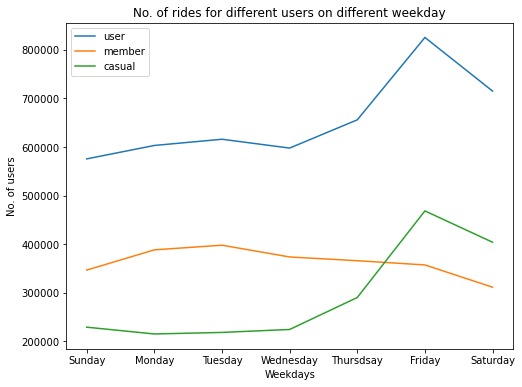

In [31]:
# Plotting the graph for different users on different weekdays
plt.figure(figsize=(8,6))
plt.plot(count_users_weekday.index,count_users_weekday.values)
plt.plot(count_member_weekday.index,count_member_weekday.values)
plt.plot(count_casual_weekday.index,count_casual_weekday.values)
plt.title('No. of rides for different users on different weekday')
plt.legend(['user','member','casual'])
labels=['Sunday','Monday','Tuesday','Wednesday','Thursdsay','Friday','Saturday']
plt.xticks(count_casual_weekday.index,labels)
plt.xlabel('Weekdays')
plt.ylabel('No. of users')
plt.show()


In [32]:
# Average ride length by weekday
user_avg_ride_len_weekday=C_bike_data.groupby('week_day')['ride_len'].mean(numeric_only=False)
user_avg_ride_len_weekday

week_day
0   0 days 00:20:38.804040151
1   0 days 00:18:14.280241564
2   0 days 00:18:03.448562483
3   0 days 00:18:13.619424074
4   0 days 00:20:48.496892496
5   0 days 00:26:11.801361257
6   0 days 00:27:50.684407205
Name: ride_len, dtype: timedelta64[ns]

In [33]:
# Average ride length for members by weekdays
member_avg_ride_len_weekday=C_bike_data[C_bike_data['member_casual']=='member'].groupby('week_day')['ride_len'].mean(numeric_only=False)
member_avg_ride_len_weekday

week_day
0      0 days 00:12:43.482389
1   0 days 00:12:23.257036266
2   0 days 00:12:27.410545107
3   0 days 00:12:21.214127355
4   0 days 00:12:47.525051464
5   0 days 00:14:49.156686699
6   0 days 00:15:11.451763912
Name: ride_len, dtype: timedelta64[ns]

In [34]:
# Average ride length for casual by weekdays
casual_avg_ride_len_weekday=C_bike_data[C_bike_data['member_casual']=='casual'].groupby('week_day')['ride_len'].mean(numeric_only=False)
casual_avg_ride_len_weekday

week_day
0   0 days 00:32:38.189581367
1   0 days 00:28:48.155929411
2   0 days 00:28:16.140945473
3   0 days 00:28:00.640417114
4   0 days 00:30:55.069137547
5   0 days 00:34:52.288208553
6   0 days 00:37:35.899873448
Name: ride_len, dtype: timedelta64[ns]

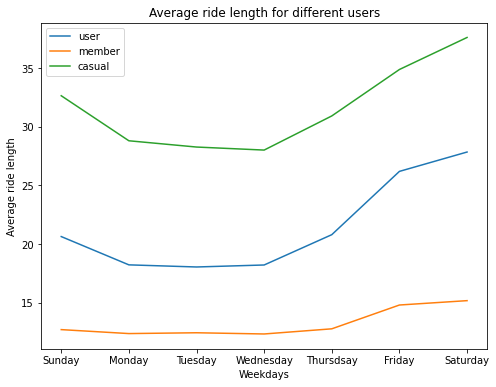

In [35]:
# Plotting graph of weekday vs average ride length
plt.figure(figsize=(8,6))
plt.plot(user_avg_ride_len_weekday/pd.Timedelta(minutes=1))
plt.plot(member_avg_ride_len_weekday/pd.Timedelta(minutes=1))
plt.plot(casual_avg_ride_len_weekday/pd.Timedelta(minutes=1))
plt.title('Average ride length for different users')
plt.legend(['user','member','casual'])
labels=['Sunday','Monday','Tuesday','Wednesday','Thursdsay','Friday','Saturday']
plt.xticks(user_avg_ride_len_weekday.index,labels)
plt.xlabel('Weekdays')
plt.ylabel('Average ride length')
plt.show()

In [36]:
# Making a new dataframe of only required attributes
b_data=C_bike_data[['ride_id','rideable_type','ride_len','week_day','distance','year','month','member_casual']]
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588302 entries, 0 to 4588301
Data columns (total 8 columns):
 #   Column         Dtype          
---  ------         -----          
 0   ride_id        object         
 1   rideable_type  object         
 2   ride_len       timedelta64[ns]
 3   week_day       int64          
 4   distance       float64        
 5   year           int64          
 6   month          int64          
 7   member_casual  object         
dtypes: float64(1), int64(3), object(3), timedelta64[ns](1)
memory usage: 280.0+ MB


In [39]:
# Number of user types
member_type=b_data['member_casual'].value_counts()
member_type

member    2539923
casual    2048379
Name: member_casual, dtype: int64

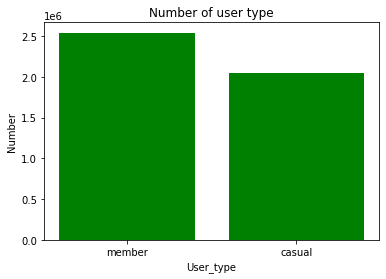

In [45]:
plt.bar(member_type.index,member_type.values,color='g')
plt.title("Number of user type")
plt.xlabel("User_type")
plt.ylabel("Number")
plt.show()

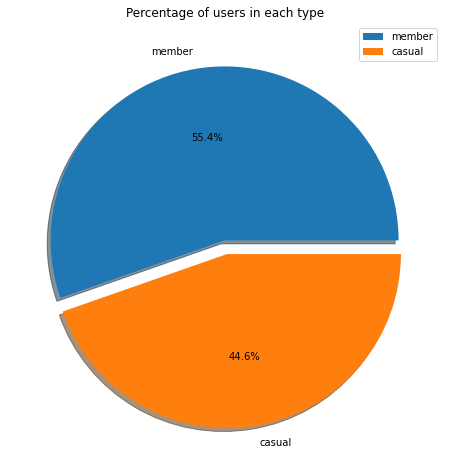

In [54]:
# plotting pie chart
plt.figure(figsize=(8,8))
plt.pie(member_type.values,labels=member_type.index,radius=1, explode=[0,0.08],shadow=True,autopct='%1.1f%%')
plt.title("Percentage of users in each type")
plt.legend(member_type.index)
plt.show()

## Number of members and casual riders over month 

In [69]:
# Number of users over month

users_over_month=b_data.groupby('month')['member_casual'].value_counts()
users_over_month


month  member_casual
1      member            68819
       casual            14690
2      member            34383
       casual             8613
3      member           130049
       casual            75642
4      member           177787
       casual           120420
5      member           234165
       casual           216829
6      member           304586
       casual           304192
7      casual           369415
       member           322906
8      casual           341476
       member           332933
9      member           328219
       casual           292931
10     member           288855
       casual           189117
11     member           185926
       casual            69978
12     member           131295
       casual            45076
Name: member_casual, dtype: int64

In [70]:
# To segregate the number of users into member or casual riders over months
list_month=[]
list_x=[]
list_y=list(users_over_month.values)
for i,j in users_over_month.index:
    list_x.append(j)
    list_month.append(str(i))

C:\Users\Somal Verma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of members and casual riders over the months')

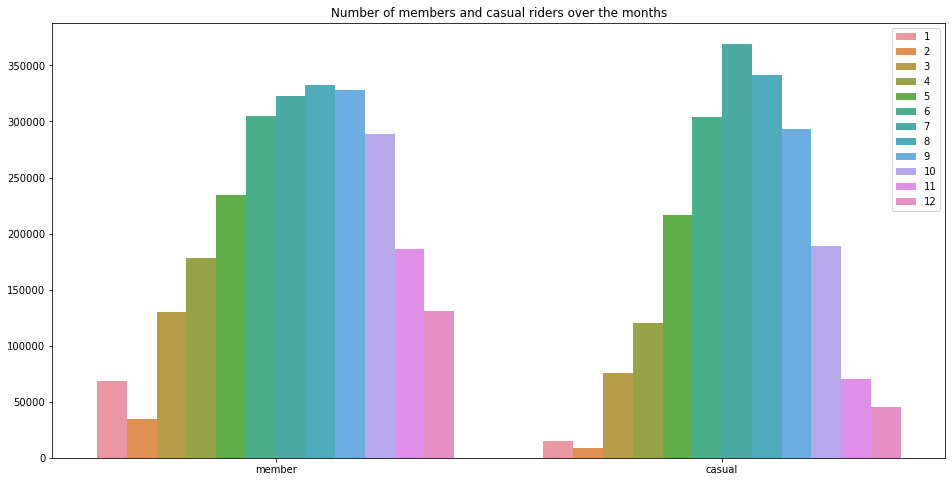

In [72]:
# Plot count of member and casual riders over the months
plt.figure(figsize=(16,8))
sns.barplot(list_x, list_y, hue=list_month)
plt.title('Number of members and casual riders over the months')

## Bike preference by user type

In [74]:
# Number of Users for a particular rideable type
ride_type=b_data.groupby('member_casual')['rideable_type'].value_counts()
ride_type

member_casual  rideable_type
casual         classic_bike     1261558
               electric_bike     474773
               docked_bike       312048
member         classic_bike     1980430
               electric_bike     559492
               docked_bike            1
Name: rideable_type, dtype: int64

In [75]:
list_member=[]
list_x=[]
list_y=list(ride_type.values)
for i,j in ride_type.index:
    list_x.append(j)
    list_member.append(str(i))

C:\Users\Somal Verma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


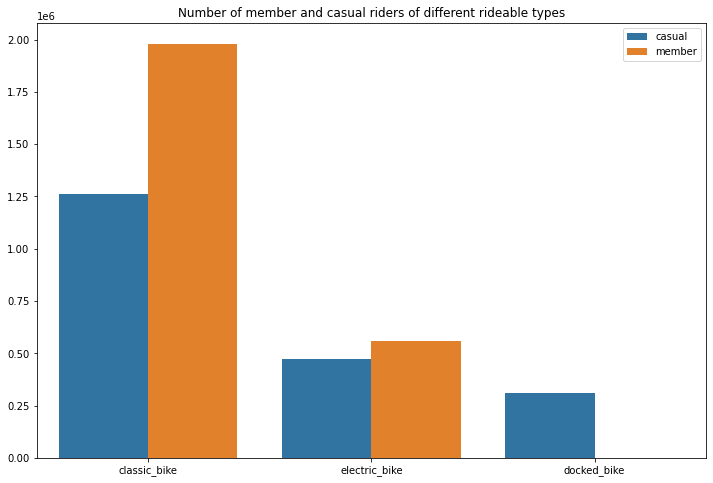

In [76]:
plt.figure(figsize=(12,8))
sns.barplot(list_x,list_y,hue=list_member)
plt.title("Number of member and casual riders of different rideable types")
plt.show()

**Classic Bike** is the most preferred bike type among both casual riders and annual members.

## Key findings

1. Annual members(55.4%) made more trips than casuals(44.6%).
2. Number of users in summer season is more and less in winters which means the demand for bike increases during summer period and decreases in winters.
3. Classic bikers are more in numbers, there are significant number of electric bikers however very few docked bikers.
   Members prefer classic and electric bikes however some casual users use docked bike as well.
4. Friday is most popular among casual riders whereas more annual members rides on tuesday.

## Recommendation

1. Increase marketing campaigns during summer season.
2. Offer an annual membership to weekday riders to increase number of annual members. 
3. Since the casual riders prefer to take longer trips averaging 32 minutes compared to annual members who average only 13 minutes. Members only rewards program can be introduced based on the trip duration to incentivize casual riders to sign up as members and be eligible for rewards.